In [1]:
import cv2
import numpy as np
import csv
import threading
from matplotlib import pyplot as plt
from keyboard import is_pressed
import csv
import os.path
from collections import Counter

faces found:  1


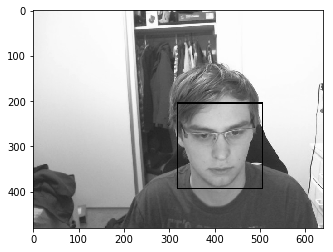

In [2]:
# initialize cascada classifier
haar_cascade = cv2.CascadeClassifier(
    'data/haarcascade_frontalface_alt.xml')

#initialize default. Change int argument to change webcam used.
cam = cv2.VideoCapture(0)

if cam.isOpened():
    #read img from camera and make a gray version for the cascada classifier
    ret_val, img = cam.read()
    
    if ret_val:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        #use the classifier to detect faces. Returns face box coordinates for each face
        faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        print("faces found: ", len(faces))

        #for each face, draw a rectangle around it
        for (x, y, w, h) in faces:     
                 cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # display the img
        plt.imshow(gray,cmap="gray")

In [3]:
def display(img,faces,numImages,lastlabel,saving):
    disp_img = np.copy(img)
    if len(faces) == 1:
        x,y,w,h = faces[0]
        savestr = ""
        if saving:
            savestr = "SAVED"
        cv2.rectangle(disp_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(disp_img,lastlabel + "  {}".format(str(numImages)) + savestr,
                            (x,y-5),cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0)) 
    return disp_img
    
    
def label(savepath,smoothCapture=False):
    csvFileWriter = None
    csvFile = None
    
    num = 0
    if os.path.isfile(savepath + "/faceLabels.csv"):
        with  open(savepath + '/faceLabels.csv', 'r') as file:
            l = np.array(list(csv.reader(file)))
            print(l.shape)
            labelCount = Counter(l[:,1])
            num = int(l[-1,0][4:-4]) +1
        csvFile = open(savepath + '/faceLabels.csv', 'a')
            
    else:
        csvFile = open(savepath + '/faceLabels.csv', 'w')
    print(labelCount)
        
    csvFileWriter = csv.writer(csvFile, delimiter=',',
                        quotechar='|', quoting=csv.QUOTE_MINIMAL,lineterminator='\n')
    
    
    cam = cv2.VideoCapture(smoothCapture)
    lastlabel = "Neutral"
    numImages = [labelCount["Neutral"],labelCount["Happy"],labelCount["Sad"],labelCount["Angry"]] 
    lastlabelidx = 0
    saving = False
    
    while True:
        key = cv2.waitKeyEx(False)
        if key == ord(' ') and saving == False and faceimg is not None:
                saving = True
                numImages[lastlabelidx] += 1
                imgName = "face"+str(num)+'.png'
                cv2.imwrite(savepath + "/" + imgName,faceimg)
                csvFileWriter.writerow([imgName,lastlabel])
                num += 1
                disp_img = display(img,faces,numImages,lastlabel,saving)
        else:        
            saving = False
            ret_val, img = cam.read()
            img = cv2.flip(img,1)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
            faceimg = None
            if len(faces) == 1:
                x,y,w,h = faces[0]
                faceimg = gray[y:y+h,x:x+w]
                if key == 2424832:
                    lastlabel = "Neutral"
                    lastlabelidx = 0
                elif key == 2490368:
                    lastlabel = "Happy"
                    lastlabelidx = 1
                elif key == 2621440:
                    lastlabel = "Sad"
                    lastlabelidx = 2
                elif key == 2555904:
                    lastlabel = "Angry"
                    lastlabelidx = 3
                    
            disp_img = display(img,faces,numImages,lastlabel,saving)
            
            
                
            
            
        cv2.imshow('my webcam', disp_img)
        
        
        if key == 27: 
            break  # esc to quit
    cv2.destroyAllWindows()

In [4]:
 label("images")

(169, 2)
Counter({'Neutral': 48, 'Happy': 41, 'Sad': 40, 'Angry': 40})
